In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from pylab import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.append("../../src/data")
from replication.PMotion import Polymer

In [5]:
#https://academic.oup.com/nar/article/42/1/e3/2437422/The-dynamics-of-genome-replication-using-deep
point = [(4.3714285714285808, 1.0420168067226889), (9.2571428571428562, 1.0126050420168067), (14.40000000000002, 1.0714285714285714), (17.228571428571435, 1.0420168067226889), (19.800000000000015, 0.97058823529411764), (24.428571428571431, 0.96218487394957974), (30.085714285714289, 0.97478991596638642), (32.657142857142873, 1.0714285714285714), (34.71428571428573, 1.1596638655462184), (37.028571428571425, 1.2983193277310923), (39.85714285714284, 1.3277310924369747), (42.428571428571445, 1.3067226890756303), (44.48571428571428, 1.5462184873949578), (46.800000000000026, 1.588235294117647), (49.371428571428581, 1.6470588235294117), (54.771428571428551, 1.672268907563025), (59.914285714285718, 1.8613445378151261), (69.942857142857122, 1.9957983193277311), (79.971428571428589, 1.9495798319327733), (89.742857142857147, 1.8781512605042017)]
x_exp,y_exp = zip(*point)
x_exp = np.array(x_exp)
y_exp = np.array(y_exp)

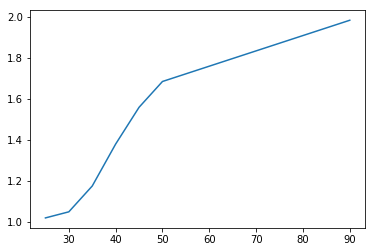

In [6]:
import _pickle as cPickle

with open("../../data/external/time-coordinate.pick","rb") as f:
    times,coordinate = cPickle.load(f)


times.keys()
time_p  = list(times.keys())
time_p.sort()
dna = []
for t  in time_p:
    dna.append(np.concatenate(times[t]).mean())
plot(time_p,dna)

{'Activ_Origins': ['Ori'],
 'Cent': './data/external/saccharomyces_cerevisiae_R64-2-1_20150113.gff',
 'N_diffu': 150,
 'R': 16,
 'benchmark': False,
 'coarse': 5000,
 'cut_off_inte': 2,
 'data_folder': './data/raw/test/traj1/',
 'dcd_period': 1000,
 'diameter_nuc': 0.18,
 'diff_alone': False,
 'diff_bind_when_free': False,
 'diff_bind_when_on_DNA': False,
 'dscale': 1.0,
 'dt_speed': 0.04,
 'dump_hic': False,
 'filename': 'test_traj1.json',
 'fork_speed': 1,
 'gauss': False,
 'len_chrom': './data/external/saccharomyces_cerevisiae_R64-2-1_20150113.gff',
 'length_steps': 1000,
 'micron': 16,
 'microtubule_length': 0.4,
 'n_steps': 100,
 'nucleole': True,
 'ori_type': ['Confirmed'],
 'p_inte': 0.05,
 'p_origins': './data/external/oridb.csv',
 'p_ribo': [[0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [450000, 150],
    

/home/jarbona/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (1,2,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


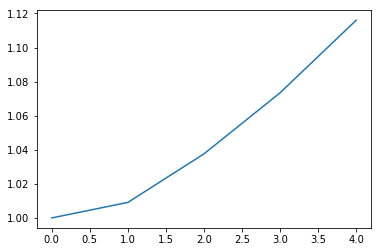

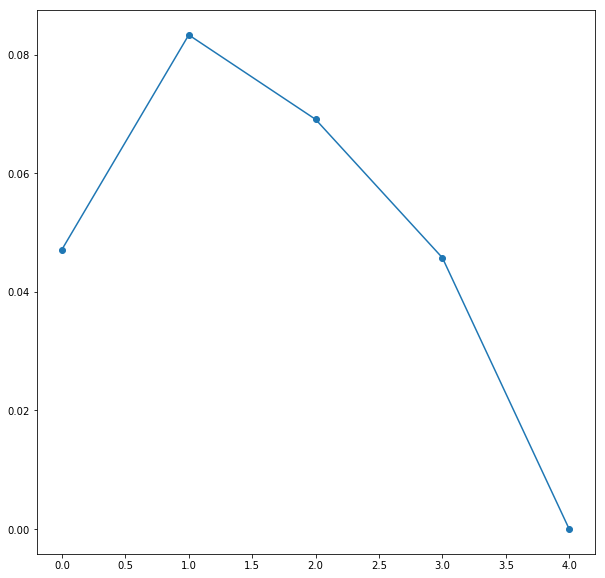

In [209]:
import sys
sys.path.append("../../src/data")
from replication.ensembleSim import ensembleSim
import json
import pprint
def load_parameters(filename):

    with open(filename, "r") as f:
        traj = json.load(f)
    return traj
def load_from_folder(folder_roots,n=5):
    parameters = load_parameters(folder_roots+"1/params.json")
    pprint.pprint(parameters)
    lengths =  load_lengths_and_centro("../."+parameters["len_chrom"], parameters["coarse"])
    print(lengths)

    E = ensembleSim(n,Nori=None, 
                      Ndiff=parameters["N_diffu"] * 2,
                      lengths=lengths,
                      p_on=parameters["p_inte"],
                      p_off=1,
                      only_one=True,
                     all_same_ori=True)
    E.run_all(load_from_file=folder_roots)
    return E
pweak = load_from_folder("../../data/raw/test/traj",n=1)
x,y,std,alls = pweak.DNAs()
plot(y)
figure(figsize=(10,10))
x,y,std,alls = pweak.Its()
"""
for y1 in alls[:5]:
    plot(y1)"""
plot(y ,"-o")
#plot(*pweak.DNAs()[:2])
#print(pweak.l_ori)

In [219]:

import matplotlib.pyplot as plt, mpld3
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.display()

/home/jarbona/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,2,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


[0, 1, 6, 8, 14, 24, 27, 29, 31, 35, 42, 44, 45]
46


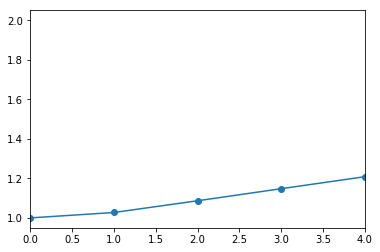

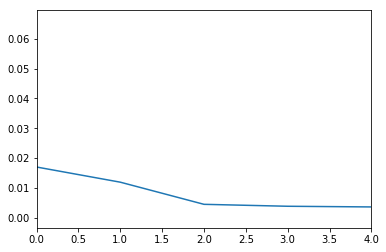

In [215]:
from replication.simulate import load_parameters
from replication.ensembleSim import ensembleSim
from replication.tools import load_ori_position, load_lengths_and_centro
import numpy
numpy.random.seed(0)
data_folder = "../../src/data/replication/"

parameters = load_parameters(data_folder + "parameters_1D.json")
parameters["coarse"] = 5000
parameters["fork_speed"] = 1#0.2
parameters["Nsim"] = 1
parameters["only_one"] = False
parameters["Ndiff"] = 300
parameters["dt_speed"]  = 0.04
parameters["p_off"] = 0
parameters["p_on"] = 0.05


if type(parameters["lengths"]) == str:
    lengths, _ = load_lengths_and_centro("../." + parameters["lengths"], parameters["coarse"],verbose=False)
    parameters["lengths"] = lengths

if type(parameters["Nori"]) == str and parameters["Nori"] != "xenope":
    l_ori = load_ori_position("../." + parameters["Nori"],
                              parameters["ori_type"],
                              parameters["lengths"],
                              parameters["coarse"],verbose=False)

print (l_ori[0])
print(lengths[0])
data_folder = parameters.pop("data_folder")
parameters.pop("ori_type")
parameters.pop("coarse")

parameters["Nori"] = l_ori

E = ensembleSim(**parameters)
E.run_all(400000)

#plot(*E.error_DNA_time(plot=True))
x,y,std,alls = E.DNAs()
plot(x,y,"-o")
xlim(0,4)
"""
for y1 in alls:
    figure()
    plot(y1)
"""
figure()
plot(*E.Its()[:2])   
xlim(0,4)
"""
#plot(E.raDNAs[0][0],"-o")
for i in range(16):
    figure()

    plot(E.aRps[0][i],"-o")

    #print(E.aRps[0][i])""";

In [ ]:
import sys
sys.path.append("../../src/data")
from replication.ensembleSim import ensembleSim
Nsim=10
xTotl = 10000
xl_ori = [list(range(xTotl))]
xNdiff = 479
xlengths =[xTotl]

E = ensembleSim(Nsim,xl_ori,xNdiff,xlengths,p_on=0.18,p_off=0.3,only_one=True,all_same_ori=True)
E.run_all(200)

(0, 40)

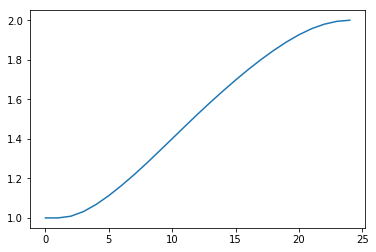

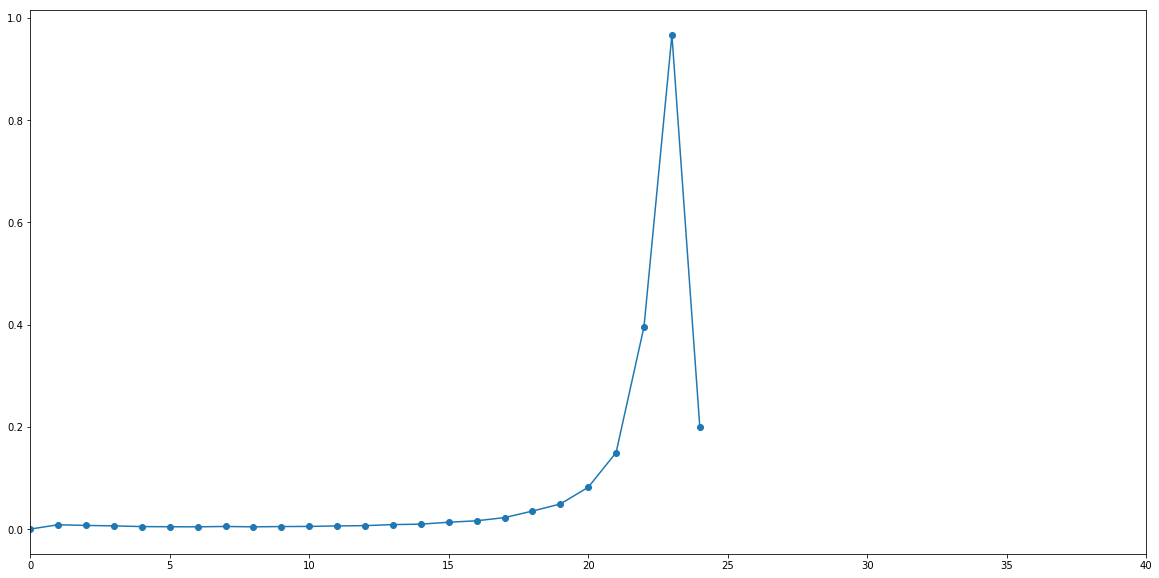

In [27]:
x,y,std,alls = E.DNAs()
shift=0
plot(y)
#plot(x_exp-0,y_exp)
figure(figsize=(20,10))
x,y,std,alls = E.Its()
#for y1 in alls[:5]:
#    plot(y1)
plot(y ,"-o")
xlim(0,40)

(0, 100)

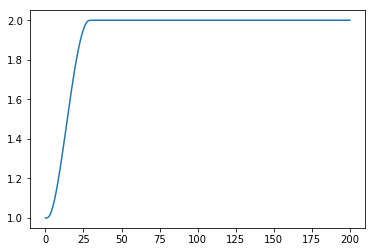

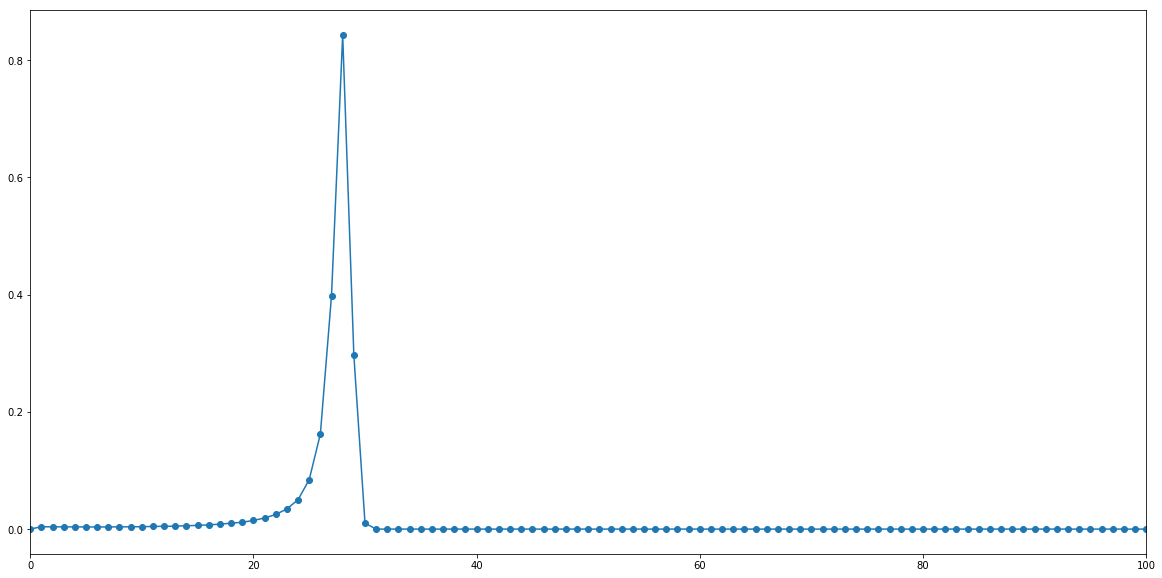

In [12]:
x,y,std,alls = E.DNAs()
shift=0
plot(y)
#plot(x_exp-0,y_exp)
figure(figsize=(20,10))
x,y,std,alls = E.Its()
#for y1 in alls[:5]:
#    plot(y1)
plot(y,"-o")
xlim(0,100)

'\nE = ensembleSim(Nsim,[Nori,Nori],Nori // 3,lengths,p_on=0.8,p_off=0.2,only_one=True,l_ori=l_ori2)\nE.run_all()\n'

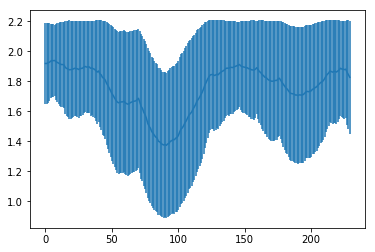

In [177]:
Total_size = 12000 # kb
Ndiff= 750
Nsim = 1000
E = ensembleSim(Nsim,l_ori,Ndiff,lengths,p_on=0.04,p_off=0.3,only_one=False,all_same_ori=True)
E.run_all()
#plot(E.get_rep_profile()[0])
m,std = E.get_mean_copie(50)

errorbar(range(len(m[0])),m[0],std[0])#plot(m,std)
l_ori2 = E.l_ori
"""
E = ensembleSim(Nsim,[Nori,Nori],Nori // 3,lengths,p_on=0.8,p_off=0.2,only_one=True,l_ori=l_ori2)
E.run_all()
"""

In [169]:
errorbar??

<Container object of 3 artists>

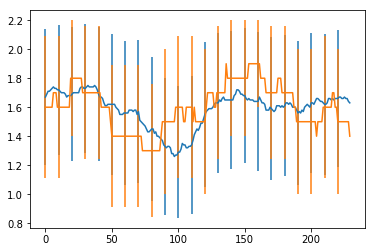

In [171]:
Nsim = 100
E = ensembleSim(Nsim,l_ori,Nori // 3,lengths,p_on=0.01,p_off=0.2,only_one=True,all_same_ori=True)
E.run_all()
#plot(E.get_rep_profile()[0])
m,std = E.get_mean_copie(50)

errorbar(range(len(m[0])),m[0],std[0],errorevery=10)#plot(m,std)

Nsim = 10
E = ensembleSim(Nsim,l_ori,Nori // 3,lengths,p_on=0.01,p_off=0.2,only_one=True,all_same_ori=True)
E.run_all()
#plot(E.get_rep_profile()[0])
m,std = E.get_mean_copie(50)

errorbar(range(len(m[0])),m[0],std[0],errorevery=10)#plot(m,std)

In [120]:
Nsim=10
E = ensembleSim(Nsim,l_ori,Nori // 3,lengths,p_on=0.8,p_off=0.2,only_one=True,all_same_ori=True,l_ori=l_ori2)
%prun E.run_all()

300 18000


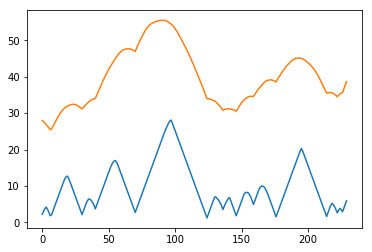

In [139]:
    
Nsim=10
Ndiff = 300
E = ensembleSim(Nsim,l_ori,Ndiff,lengths,p_on=0.8,p_off=0.2,only_one=True,all_same_ori=True,l_ori=l_ori2)
E.run_all()
plot(E.get_rep_profile()[0])
Nsim=100
E = ensembleSim(Nsim,l_ori,Ndiff,lengths,p_on=0.2,p_off=1,only_one=False,all_same_ori=True,l_ori=l_ori2)
E.run_all()
plot(E.get_rep_profile()[0])

print(Nori // 3,Nori*20)    
#plot(E.get_rep_profile()[0])

In [64]:
#coordinate['25'][2]

In [68]:
k = list(times.keys())
k.sort()
m = []
for kk in k:
    m = list(set(coordinate[kk][2] + m))
    print(len(m))
    #print(len(coordinate[kk][2]),len(set(coordinate['25'][2]+coordinate[kk][2])))

290
290 290
291
290 291
291
290 291
291
290 291
291
289 291
291
290 290
291
291 291


In [36]:
import _pickle as cPickle
import pprint
with open("../../data/raw/1D_Ensemble_best_one_diffu_100/ensembleSim.pick","rb") as f:
    E = cPickle.load(f)
import json
def load_parameters(filename):

    with open(filename, "r") as f:
        traj = json.load(f)
    return traj
parameters = load_parameters("../../data/raw/1D_Ensemble_best_one_diffu_100/"+"/params.json")
pprint.pprint(parameters)

{'Ndiff': 150,
 'Nori': './data/external/oridb.csv',
 'Nsim': 100,
 'all_same_ori': True,
 'data_folder': './data/raw/1D_Ensemble_best_one_diffu_100/',
 'filename': '1D_Ensemble_best_one_diffu_100.json',
 'lengths': [230,
             810,
             315,
             1530,
             575,
             270,
             1090,
             560,
             435,
             745,
             665,
             1075,
             920,
             780,
             1090,
             945],
 'only_one': True,
 'ori_type': ['Confirmed'],
 'p_off': 0.3,
 'p_on': 0.05}


out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of

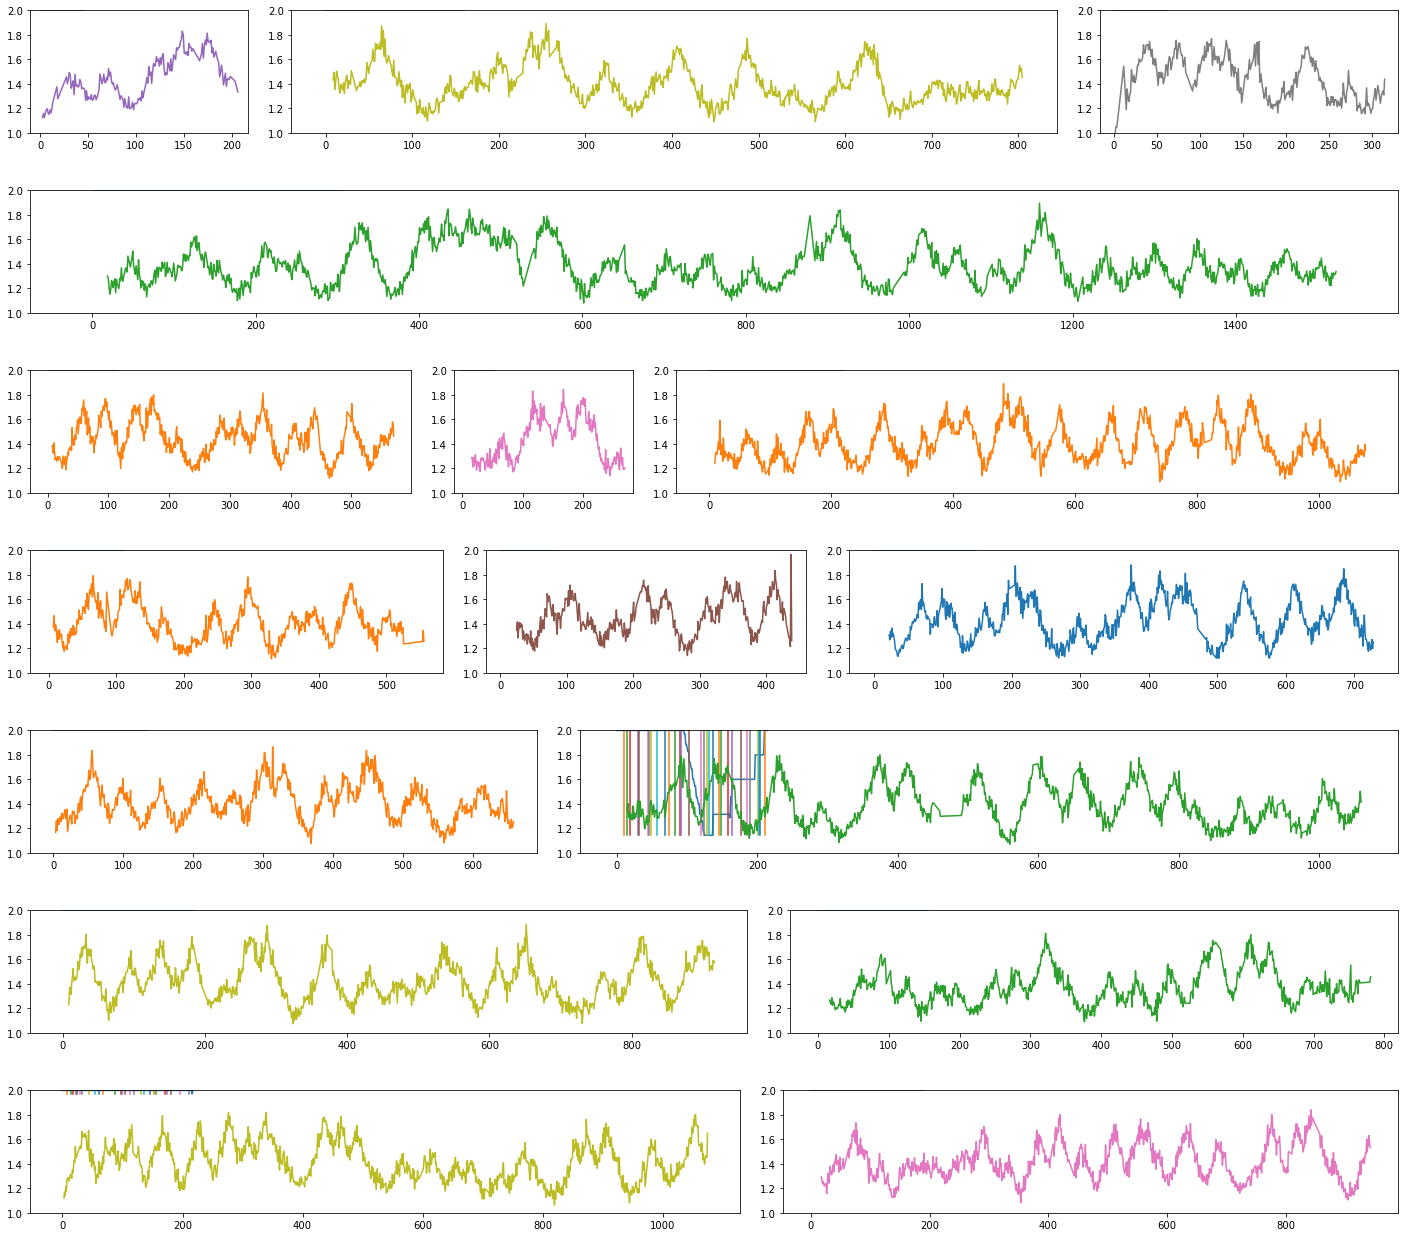

In [7]:
result = {"chr":[],"start":[],"end":[],"mean_copie_exp":[],"mean_copie_simu":[]}
profile = False
#f = figure(figsize=(20,20))

f = figure(figsize=(20,20))

E = pweak
lengths = E.lengths
l_ori = E.l_ori
coarse = 5000

mean_copie = {}
if not profile:
    k = list(times.keys())
    k.sort()
    for ikk,kk in enumerate(k):
        
        mean_copie[kk] = E.get_mean_copie(int(kk))[0]
        
extra =    [0,0,0,1,2,2,2,3,3,3,4,4,5,5,6,6]
position = [0,1,2,0,0,1,2,0,1,2,0,1,0,1,0,1]
s = 0.03
sh = 0.04
height =  1 / ( 7 +1) - sh

margin_right = 0.02


for chro in range(16):
    #ax = f.add_subplot(4,4,chro + 1)
    #ax = f.add_subplot(gs[chro])
    
    column = extra[chro]
    tot = extra.count(column)
    p = position[chro]
    
    row_lengths = [l for l,i in zip(lengths,extra) if column == i]
    crow_length = [0] + np.cumsum(row_lengths).tolist()
    
    xstart =  (p +1 )* s + (1 - margin_right-tot*s)*crow_length[p] / (sum(row_lengths) )
    ystart = 1 - (column + 1) * (height + sh )
    w = (1 - margin_right-tot*s)*row_lengths[p] / (sum(row_lengths) )
    h = height
    
    #print([xstart,ystart,w,h])
    f.add_axes([xstart,ystart,w,h])
        
    
    #chro = 3
    if profile:
        Prof =  E.get_rep_profile()[chro]
        plot(Prof )
        top = Prof
    else:
        k = list(times.keys())
        k.sort()
        for ikk,kk in enumerate(k):
            if ikk == 0:
                mean_C = mean_copie[kk][chro]
            else:
                mean_C +=  mean_copie[kk][chro]
        plot(mean_C / len(k))
        top = mean_C / len(k)
    
    for x in l_ori[chro]:
        mini= min(top)
        maxi= max(top)
        plot([x,x],[mini,maxi])

    def get_rep_prof(times,coordinate,ch,profile=True):
        k = list(times.keys())
        k.sort()
        
        #To get all the coordinates
        m = []
        for kk in k:
            m = list(set(coordinate[kk][ch] + m))
        m.sort()
        #print(len(m))
            
        rep = np.zeros(len(m))  #+ 70
        norm = np.zeros(len(m))
        for ilocus,locus in enumerate(m): 
            #print(locus)
            for kk in k[::-1]:
                if locus in coordinate[kk][ch]:
                    i = list(coordinate[kk][ch]).index(locus)
                    if profile:
                        if times[kk][ch][i] > 1.5:
                            rep[ilocus ] = min(int(kk),70)
                            
                    else:
                        #Mean replication value
                        rep[ilocus ] += times[kk][ch][i] 
                        norm[ilocus ] += 1
        norm[norm==0] = 1
        if profile:
            rep[rep == 0 ] = 70
        #print(times[kk][ch])
        return m,rep / norm

    locci,p = get_rep_prof(times,coordinate,chro,profile=profile)
    
    #m = lengths[chro] / len(p)
    #plot(np.arange(len(p)) * m,p)
    if not profile:
        for loc,copie in zip(locci,p):
            result["chr"].append(chro + 1)

            result["start"].append(loc)
            result["end"].append(loc)
            result["mean_copie_exp"].append(copie)
            try:
                result["mean_copie_simu"].append(top[int(loc/coarse)])
            except IndexError:
                print("out of bounds")
                result["mean_copie_simu"].append(top[-1])
            
            
        
    plot(np.array(locci)/coarse,p,"-")
    if not profile:
        ylim(1,2)
        
savefig("plot.png")
    #plot(norm)
    
#print(times["25"][0])

(0.94842530000000003,
 2.0500749857142857,
 0.94999999999999996,
 2.0499999999999998)

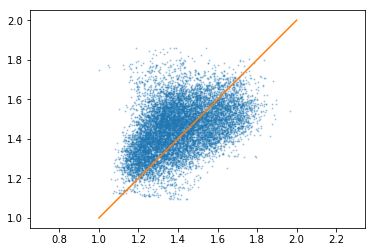

In [25]:
p = pandas.DataFrame(result)
plot(p["mean_copie_exp"],p["mean_copie_simu"],"o",markersize=1,alpha=0.3)

plot([1,2],[1,2])
xlim(1,2)
ylim(1,2)
axis("equal")


(0, 100)

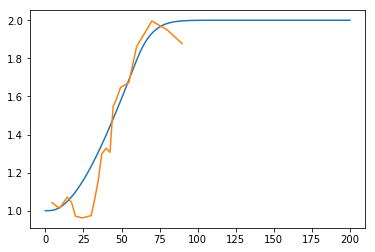

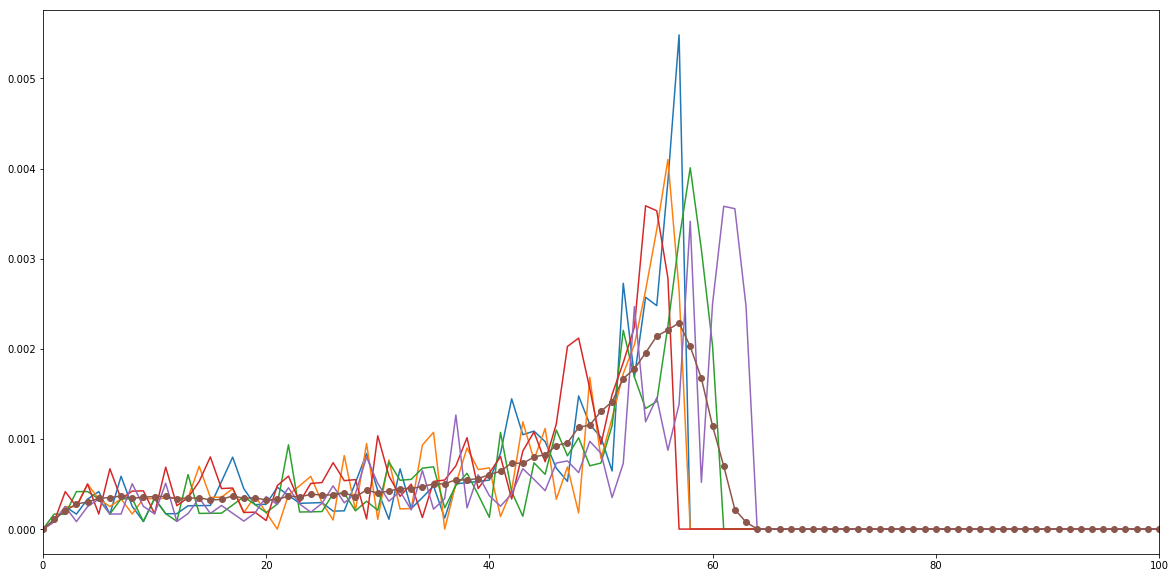

In [28]:
x,y,std,alls = E.DNAs()
shift=0
plot(y)
plot(x_exp-0,y_exp)
figure(figsize=(20,10))
x,y,std,alls = E.Its()
for y1 in alls[:5]:
    plot(y1)
plot(y,"-o")
xlim(0,100)

In [216]:
print(lengths)
#import matplotlib.gridspec as gridspec
#gridspec??

[230, 810, 315, 1530, 575, 270, 1090, 560, 435, 745, 665, 1075, 920, 780, 1090, 945]


In [12]:
E.error_DNA_time()
plot(E.get_rep_profile()[0])

TypeError: unsupported operand type(s) for /: 'list' and 'int'

1.94871328501


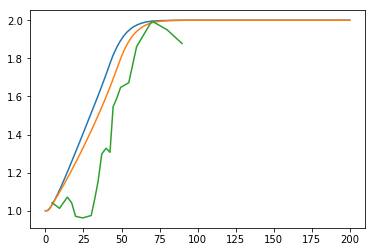

In [288]:
from skopt import gp_minimize
from replication.ensembleSim import ensembleSim
def error(x,returnv=False):
    Nsim=10
    Nori = 90
    if len(x) == 2:
        only_one = True
    else:
        only_one = False
    if only_one:
        Ndiff = x[0]
        p_on = x[1]
        p_off=0.2
    else:
        Ndiff = x[0]
        p_on = x[1]
        p_off= x[2]
    #print(Ndiff,p_on)
    E = ensembleSim(Nsim,l_ori,Ndiff,lengths,p_on=p_on,p_off=p_off,
                    only_one=only_one,all_same_ori=True,l_ori=l_ori2)
    E.run_all()

    if returnv:
        return E
    else:
        return E.error_DNA_time()[0]
#gp_minimize??

print(error([300,0.8,0.2]))
E = error([300,0.8,0.2],returnv=True,)
x,y,std,alls = E.DNAs()
plot(y)
E = error([300,0.8,.01],returnv=True)
x,y,std,alls = E.DNAs()
shift=0
plot(y)
plot(x_exp-0,y_exp)
#for i in range(4):
#    plot(alls[i])
#res = gp_minimize(f, [(-2.0, 2.0)],n_jobs=5)


In [23]:
import sys
sys.path.append("../../src/data")
from replication.ensembleSim import ensembleSim
Nsim=50
xTotl = 10000
xl_ori = [list(range(xTotl))]
xNdiff = xTotl // 10
xlengths =[xTotl]

#E = ensembleSim(Nsim,xl_ori,xNdiff,xlengths,p_on=0.04,p_off=0.3,only_one=True,all_same_ori=True)
#E.run_all(200)


from skopt import gp_minimize
from replication.ensembleSim import ensembleSim
def error(x,returnv=False):
    Nsim=3
    if len(x) == 2:
        only_one = True
    else:
        only_one = False
    if only_one:
        Ndiff = x[0]
        p_on = x[1]
        p_off=0.2
    else:
        Ndiff = x[0]
        p_on = x[1]
        p_off= x[2]
    #print(Ndiff,p_on)
    E = ensembleSim(Nsim,xl_ori,Ndiff,xlengths,
                    p_on=p_on,p_off=p_off,only_one=only_one,all_same_ori=True)
    E.run_all(100)

    if returnv:
        return E
    else:
        return E.error_firing_time()[0]
    
#E = error([300,0.8,0.2],returnv=False)

#gp_minimize??

0.00748976400562


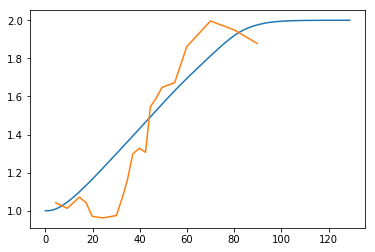

In [289]:
E = error([100,0.1,],returnv=True)
x,y,std,alls = E.DNAs()
shift=0
plot(y)
plot(x_exp-0,y_exp)

In [28]:
res_two_noshift = gp_minimize(error, [(100,899),(0.01,1.0),(0.01,1.0)],n_jobs=1)

In [24]:
res = gp_minimize(error, [(100,899),(0.001,1.0)],n_jobs=1)

In [21]:
%timeit gp_minimize(f, [(-2.0, 2.0)],n_jobs=5,verbose=False)

/home/jarbona/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/jarbona/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/jarbona/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/jarbona/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/jarbona/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("

1 loop, best of 3: 1min 31s per loop


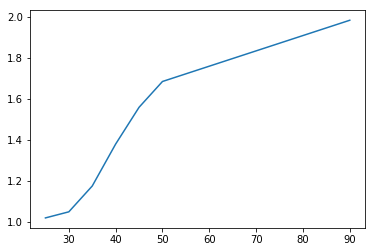

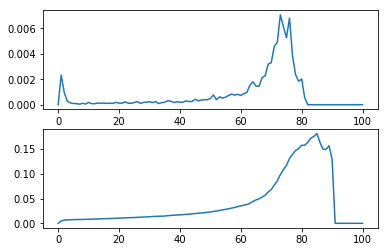

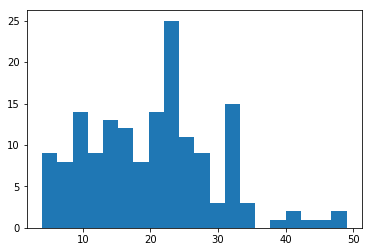

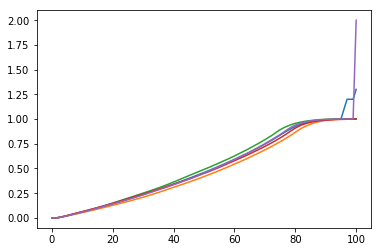

In [33]:
f = figure()
ax = f.add_subplot(211)
x,y,std,alls = E.Its()
plot(y)
#for i in range(4):
#    plot(alls[i])
ax = f.add_subplot(212)
x,y,std,alls = E.Fds()
plot((E.Fds()[1]))
#for i in range(4):
#    plot(alls[i])
figure()
a = hist(E.n_activated_oris(),bins=20)

figure()
x,y,std,alls = E.DNAs()
plot(y)
for i in range(4):
    plot(alls[i])



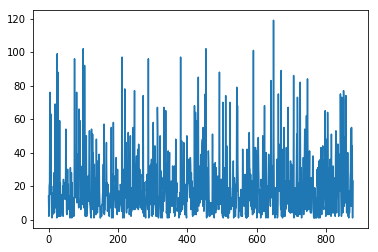

In [11]:
do = (np.array(l_ori[1:])-np.array(l_ori[:-1]))
plot(do)

In [12]:
Nsim=10
E1 = ensembleSim(Nsim,Nori,Nori // 6 ,Nori*20,p_on=0.5,p_off=0.2,only_one=True,all_same_ori=True,l_ori=l_ori)
E1.run_all()


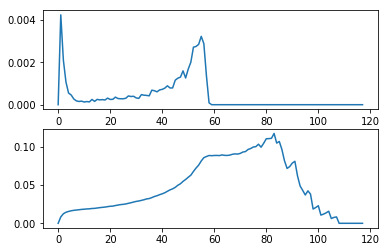

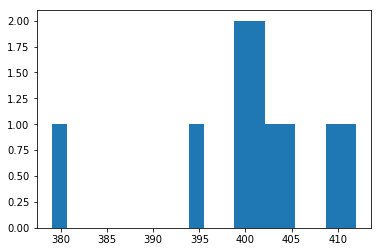

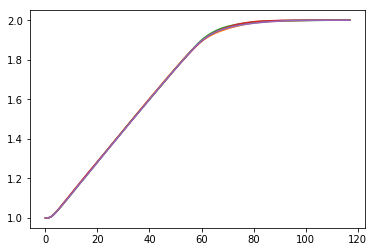

In [13]:
f = figure()
ax = f.add_subplot(211)
x,y,std,alls = E1.Its()
plot(y)
#for i in range(4):
#    plot(alls[i])
ax = f.add_subplot(212)
plot((E1.Fds()[1]))
figure()
a = hist(E1.n_activated_oris(),bins=20)

figure()
x,y,std,alls = E1.DNAs()
plot(y)
for i in range(4):
    plot(alls[i])



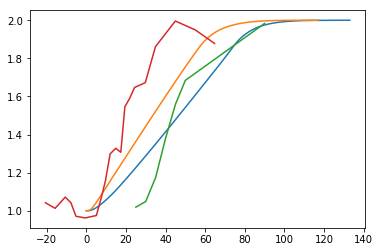

In [15]:
x,y,std,alls = E.DNAs()
plot(y)

x,y1,std,alls = E1.DNAs()
plot(y1)

plot(time_p,dna)
plot(x_exp-25,y_exp)
#for i in range(4):
#    plot(alls[i])

In [16]:
np.random.seed(3)

Its = []
Fds = []
Nsim = 1000
for sim in range(Nsim):
    #print(sim)
    S = simu(Nori,Nori // 3,Nori*10,p_on=0.01,p_off=0.2,only_one=True)
    S.simulate(1000)  
    Its.append(S.poly.get_firing_time_It()[1])
    Fds.append(S.poly.get_fork_density())

KeyboardInterrupt: 

In [ ]:
print(S.poly.origins)
pf = S.poly.get_replication_profile()
plot(pf)
pf[:10]

In [ ]:
maxl = max(map(len,Its))

normed_it = np.zeros((Nsim,maxl))
for iIt,It in enumerate(Its):
    normed_it[iIt,:len(It)] = It
    
x = np.arange(maxl)
y = np.mean(normed_it,axis=0)
err = np.std(normed_it,axis=0)
#errorbar(x,y,err)
plot(np.mean(normed_it,axis=0) )

In [ ]:
maxl = max(map(len,Fds))

normed_Fd = np.zeros((Nsim,maxl))
for iFd,Fd in enumerate(Fds):
    normed_Fd[iFd,:len(Fd)] = Fd
    
x = np.arange(maxl)
y = np.mean(normed_Fd,axis=0)
err = np.std(normed_Fd,axis=0)
#errorbar(x,y,err)
plot(np.mean(normed_Fd,axis=0))
plot(np.mean(normed_it,axis=0) * 50)

In [ ]:
hist(list(map(len,Its)),bins=50,range=[0,200])

In [ ]:
p = S.poly.get_replication_profile()
plot(p)
ft,It = S.poly.get_firing_time_It()
figure()
plot(It)
#plot(ft)

In [ ]:
for iIt,It in enumerate(Its[:10]):
    plot(It)
ylim(0,0.2)

In [ ]:
plot(S.poly.get_fork_density())

In [10]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

maxi = 500
x = x[:maxi]
y = y[:maxi]
fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1,1))


line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

c = np.arange(0,2*3.1415,0.01)
X = np.cos(c),np.sin(c)

#x = np.linspace(0, 10, 1000)
def init():
    line.set_data([], [])
    #line2.set_data([],[])
    line2.set_data(X[0],X[1])

    return line,line2

def animate(i):
    line.set_data(x[:i],y[:i])
    
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(x), interval=20, blit=True)

ImportError: No module named 'JSAnimation'

<function __main__.toi>

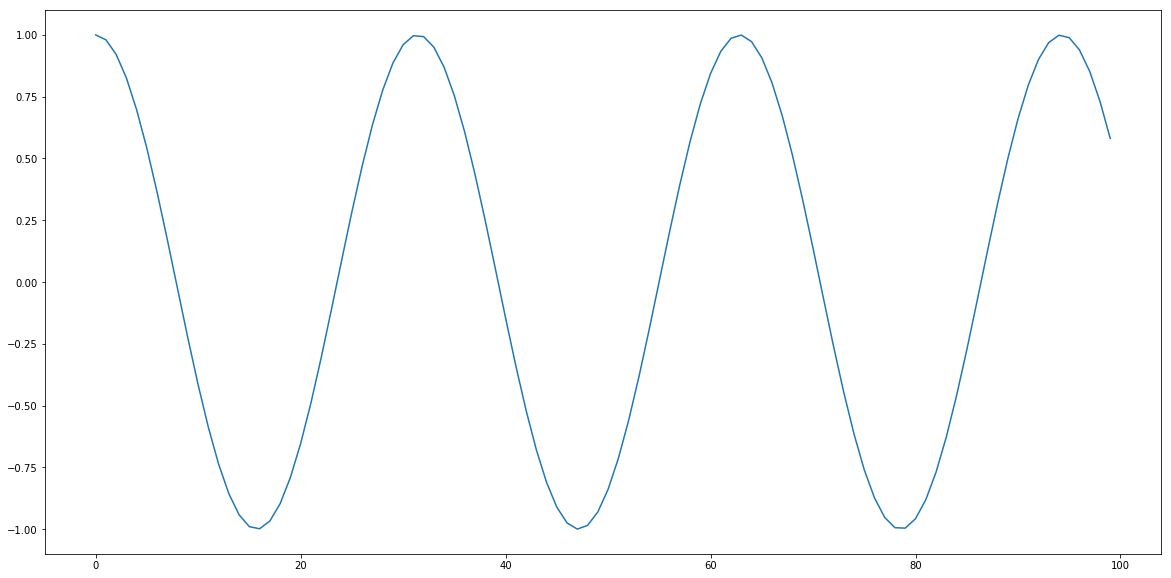

In [14]:
from IPython.html.widgets import interact, fixed,interact_manual,IntSlider
import numpy as np


def toi(omega,model):
    #start = 100
    #time=max(time,start+1)
    #print traj[:time]
    F = figure(figsize=(20,10))

    x = np.arange(100)
    if model == 0:
        plot(cos(omega * x / 10.))
    else:
        plot(cos(omega * x / 10.))
    #F.tight_layout()

interact(toi,omega=IntSlider(min=0,max=5,step=1,value=2),
                model=IntSlider(min=0,max=1,value=0))

In [1]:
from pythreejs import *
import numpy as np
from IPython.display import display
from ipywidgets import HTML, Text
from traitlets import link, dlink

In [2]:
ball = Mesh(geometry=SphereGeometry(radius=1), 
                                    material=LambertMaterial(color='red'),
                                    position=[2, 1, 0])

scene = Scene(children=[ball, AmbientLight(color='#777777')])

c = PerspectiveCamera(position=[0, 5, 5], up=[0, 0, 1],
                      children=[DirectionalLight(color='white', 
                                                 position=[3, 5, 1], 
                                                 intensity=0.5)])
renderer = Renderer(camera=c, 
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)])
display(renderer)

In [5]:
dir(renderer)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_comm_changed',
 '_config_changed',
 '_cross_validation_lock',
 '_deprecate_traits',
 '_display_callbacks',
 '_dom_classes',
 '_find_my_config',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_ipython_display_',
 '_keys_default',
 '_layout_default',
 '_load_config',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_property_lock',
 '_register_validator',
 '_remove_notifiers',
 '_send',
 '_should_send_property',
 '_split_state_buffers',
 '_state